# Import Library

In [2]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# Load Data

In [4]:
def map_json_files(folder_path,sub_path):
    # List untuk menyimpan semua data dari file JSON
    data = []
    
    # Iterasi melalui semua file dalam folder
    for sub in sub_path:
        for dirpath, dirnames, filenames in os.walk(folder_path+sub):
            for file in filenames:
                # Cek apakah file adalah file teks (JSON)
                if file.endswith(".txt"):  # Sesuaikan jika formatnya JSON langsung
                    file_path = os.path.join(dirpath, file)
                    
                    # Membuka dan membaca file
                    with open(file_path, 'r') as f:
                        file_data = json.load(f)  # Muat file JSON
                        
                        # Tambahkan data ke dalam list
                        data.extend(file_data)
    
    # Memasukkan data ke dalam Pandas DataFrame
    df = pd.DataFrame(data)
    return df

# Contoh penggunaan
folder_path = 'C:/Users/snsv/Documents/Data Analyst/kasir pintar/DATASET/LOG/'  
sub_file_path = ['123','345','567']

df_log = map_json_files(folder_path,sub_file_path)

# Data Understanding

In [6]:
df_log.shape

(2400, 5)

In [7]:
df_log.dtypes

mode          object
kode          object
status         int64
keterangan    object
timestamp     object
dtype: object

In [8]:
df_log.head()

,mode,kode,status,keterangan,timestamp
0,add_laporan_transaksi,20180907225002,0,Menambah Laporan Transaksi 20180907225002,2018-09-07 22:48:14
1,edit_barang,50008199,0,Mengubah Barang 50008199,2018-09-07 22:48:28
2,add_laporan_transaksi,20180908020408,0,Menambah Laporan Transaksi 20180908020408,2018-09-08 02:02:20
3,add_laporan_transaksi,20180908124529,0,Menambah Laporan Transaksi 20180908124529,2018-09-08 12:43:41
4,add_laporan_transaksi,20180908125120,0,Menambah Laporan Transaksi 20180908125120,2018-09-08 12:49:30


# Data Prosessing

In [10]:
df_log['timestamp'] = pd.to_datetime(df_log['timestamp'])
df_log['year_month'] = df_log['timestamp'].dt.to_period('M').dt.to_timestamp()
hari_indonesia = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}
df_log['hour'] = df_log['timestamp'].dt.to_period('H').dt.hour
df_log['day'] = df_log['timestamp'].dt.weekday
df_log['hari'] = df_log['timestamp'].dt.day_name().map(hari_indonesia)
df_log

C:\Users\snsv\AppData\Local\Temp\ipykernel_3068\434528876.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_log['hour'] = df_log['timestamp'].dt.to_period('H').dt.hour


,mode,kode,status,keterangan,timestamp,year_month,hour,day,hari
0,add_laporan_transaksi,20180907225002,0,Menambah Laporan Transaksi 20180907225002,2018-09-07 22:48:14,2018-09-01,22,4,Jumat
1,edit_barang,50008199,0,Mengubah Barang 50008199,2018-09-07 22:48:28,2018-09-01,22,4,Jumat
2,add_laporan_transaksi,20180908020408,0,Menambah Laporan Transaksi 20180908020408,2018-09-08 02:02:20,2018-09-01,2,5,Sabtu
3,add_laporan_transaksi,20180908124529,0,Menambah Laporan Transaksi 20180908124529,2018-09-08 12:43:41,2018-09-01,12,5,Sabtu
4,add_laporan_transaksi,20180908125120,0,Menambah Laporan Transaksi 20180908125120,2018-09-08 12:49:30,2018-09-01,12,5,Sabtu
...,...,...,...,...,...,...,...,...,...
2395,ganti_password,0,1,Ganti Password,2019-07-17 17:47:47,2019-07-01,17,2,Rabu
2396,ganti_password,0,1,Ganti Password,2019-07-17 17:48:29,2019-07-01,17,2,Rabu
2397,login,0,0,Masuk Google dengan AndroidOS 182.1.67.90,2019-07-22 13:28:34,2019-07-01,13,0,Senin
2398,logout,0,0,Keluar dari Aplikasi,2019-07-22 13:59:44,2019-07-01,13,0,Senin


In [11]:
df_log.dtypes

mode                  object
kode                  object
status                 int64
keterangan            object
timestamp     datetime64[ns]
year_month    datetime64[ns]
hour                   int64
day                    int32
hari                  object
dtype: object

In [12]:
df_log['mode'].value_counts()

mode
add_laporan_transaksi                 592
login                                 440
edit_barang                           223
logout                                215
add_barang                            116
edit_toko                             100
delete_laporan_transaksi_sementara     92
delete_barang                          88
tambah_stok                            66
edit_laporan_transaksi                 48
update_hak_akses                       40
edit_pelanggan                         37
edit_staff                             34
add_laporan_pembelian                  34
add_pelanggan                          31
add_diskon                             29
aktif_plugin                           28
edit_laporan_pembelian                 26
delete_diskon                          25
delete_laporan_transaksi               10
export_barang                          10
edit_profil                            10
edit_diskon                             9
topup                        

In [13]:
for index,row in df_log['kode'].value_counts().items():
    print(f'{index} : {row}')

0 : 700
33 : 46
60 : 37
didit13@mhs.if.its.ac.id : 32
burhanudin13@mhs.if.its.ac.id : 23
5181i1 : 20
47868 : 19
215 : 17
20180919111859 : 16
bussiness_plugin : 15
5 : 15
8992696415324 : 13
mustofaahmad29@gmail.com : 12
super@gmail.com : 11
food_menu_plugin : 11
20180829111008 : 10
AMSRT : 10
8996001318430 : 10
20180829140715 : 10
AMSYR : 9
6 : 8
4016845 : 8
4016554 : 8
gcghfhhgghgf : 7
572 : 7
3013170 : 7
didit@gmail.com : 7
4015755 : 6
2926 : 6
y : 6
AMZG : 6
8995106306373 : 5
14 : 5
hdijzhs1@kasirpintar.co.id : 5
47766 : 5
8995227500247 : 5
8996001302088 : 5
4 : 5
50008199 : 5
1796 : 4
370 : 4
Alfalink : 4
abcde100 : 4
20181104181003 : 4
ingredients_plugin : 4
8886001038011 : 4
9786020316802 : 4
A0164769964 : 4
3622004 : 4
fitri.chacha911@gmail.com : 4
AZ : 4
20190209051051 : 4
102751 : 3
20180729113449 : 3
092399602859 : 3
3013202 : 3
3 : 3
377 : 3
joko@yahoo.com : 3
hoho@gmauil.xoek : 3
png1@kasirpintar.co.id : 3
12321321 : 3
20190704164706 : 3
ARM : 3
587678 : 3
xxxx@gmail.com : 3

In [14]:
for index,row in df_log['keterangan'].value_counts().items():
    print(f'{index} : {row}')

Keluar dari Aplikasi : 215
Masuk Google dengan  : 136
Mengubah Data Toko : 100
Masuk Google dengan MiTablet : 49
Masuk Biasa dengan  : 34
Upadate Hak Akses didit13@mhs.if.its.ac.id : 23
Mengubah Barang 5181i1 : 18
Mengubah Barang 47868 : 18
Masuk Biasa dengan MiTablet : 15
Aktif Plugin bussiness_plugin : 15
Masuk Biasa dengan  AndroidOS 103.121.18.126 : 15
Mengubah Staffburhanudin13@mhs.if.its.ac.id : 14
Mengubah Laporan Pembelian 20180919111859 : 14
Mengubah Barang 5 : 13
Mengubah Barang 8992696415324 : 12
Aktif Plugin food_menu_plugin : 11
Mengubah Data Pelanggan super@gmail.com : 11
Mengubah Barang AMSRT : 10
Export Barang : 10
Mengubah Data Profil : 10
Mengubah Laporan Transaksi 20180829111008 : 10
Mengubah Laporan Transaksi 20180829140715 : 10
Masuk Google dengan MiTablet AndroidOS 103.119.66.115 : 10
Masuk Google dengan MiTablet AndroidOS 103.119.66.39 : 9
Mengubah Staffdidit13@mhs.if.its.ac.id : 9
Masuk Google dengan MiTablet AndroidOS 158.140.171.16 : 9
Mengubah Barang AMSYR : 

In [15]:
for i in df_log['keterangan'].unique():
    tmp = df_log.loc[df_log['keterangan']==i]
    print(f'*********{i}*********')
    for index,row in tmp['kode'].value_counts().items():
        print(f'{index} : {row}')

*********Menambah Laporan Transaksi 20180907225002*********
20180907225002 : 1
*********Mengubah Barang 50008199*********
50008199 : 5
*********Menambah Laporan Transaksi 20180908020408*********
20180908020408 : 1
*********Menambah Laporan Transaksi 20180908124529*********
20180908124529 : 1
*********Menambah Laporan Transaksi 20180908125120*********
20180908125120 : 1
*********Mengubah Laporan Transaksi 20180908020408*********
20180908020408 : 1
*********Mengubah Barang 1000001*********
1000001 : 3
*********Menambah Laporan Transaksi 20180910085517*********
20180910085517 : 1
*********Menambah Data Suplier yuhu@gmail.com*********
yuhu@gmail.com : 1
*********Menambah Laporan Transaksi 20180911234616*********
20180911234616 : 1
*********Menambah Laporan Pembelian 20180919111859*********
20180919111859 : 1
*********Mengubah Laporan Pembelian 20180919111859*********
20180919111859 : 14
*********Menambah Barang 12000*********
12000 : 1
*********Tambah Stok Transaksi Pembelian 4016845******

In [16]:
for i in df_log['keterangan'].loc[df_log['mode']=='edit_barang'].unique():
    tmp = df_log.loc[df_log['keterangan']==i]
    print(f'*********{i}*********')
    for index,row in tmp['kode'].value_counts().items():
        print(f'{index} : {row}')

*********Mengubah Barang 50008199*********
50008199 : 5
*********Mengubah Barang 1000001*********
1000001 : 3
*********Mengubah Barang 8995179100915*********
8995179100915 : 1
*********Mengubah Barang 8996001318432*********
8996001318432 : 1
*********Mengubah Barang Lau09Methanol*********
Lau09Methanol : 1
*********Mengubah Barang ALSRT32*********
ALSRT32 : 1
*********Mengubah Barang ATM*********
ATM : 1
*********Mengubah Barang AAM*********
AAM : 1
*********Mengubah Barang ASG*********
ASG : 1
*********Mengubah Barang 5901*********
5901 : 2
*********Mengubah Barang 7292929*********
7292929 : 1
*********Mengubah Barang 590090*********
590090 : 3
*********Mengubah Barang 8992696405578*********
8992696405578 : 1
*********Mengubah Barang 089686598421*********
089686598421 : 2
*********Mengubah Barang OCT 2009*********
OCT 2009 : 2
*********Mengubah Barang 7292920*********
7292920 : 1
*********Mengubah Barang 7292921*********
7292921 : 1
*********Mengubah Barang 268929*********
268929 : 1


In [17]:
for i in df_log['keterangan'].loc[df_log['mode']=='add_laporan_transaksi'].unique():
    tmp = df_log.loc[df_log['keterangan']==i]
    print(f'*********{i}*********')
    for index,row in tmp['kode'].value_counts().items():
        print(f'{index} : {row}')

*********Menambah Laporan Transaksi 20180907225002*********
20180907225002 : 1
*********Menambah Laporan Transaksi 20180908020408*********
20180908020408 : 1
*********Menambah Laporan Transaksi 20180908124529*********
20180908124529 : 1
*********Menambah Laporan Transaksi 20180908125120*********
20180908125120 : 1
*********Menambah Laporan Transaksi 20180910085517*********
20180910085517 : 1
*********Menambah Laporan Transaksi 20180911234616*********
20180911234616 : 1
*********Menambah Laporan Transaksi 20180919165727*********
20180919165727 : 1
*********Menambah Laporan Transaksi 20180924163932*********
20180924163932 : 1
*********Menambah Laporan Transaksi 20180925145049*********
20180925145049 : 1
*********Menambah Laporan Transaksi 20180929011608*********
20180929011608 : 1
*********Menambah Laporan Transaksi 20180929083206*********
20180929083206 : 1
*********Menambah Laporan Transaksi 20180929205049*********
20180929205049 : 1
*********Menambah Laporan Transaksi 20180930122006**

In [18]:
result = df_log.groupby(['year_month', 'mode']).size().reset_index(name='count')

In [19]:
result.dtypes

year_month    datetime64[ns]
mode                  object
count                  int64
dtype: object

In [20]:
result

,year_month,mode,count
0,2018-09-01,add_barang,7
1,2018-09-01,add_laporan_pembelian,17
2,2018-09-01,add_laporan_transaksi,46
3,2018-09-01,add_pelanggan,1
4,2018-09-01,add_suplier,1
...,...,...,...
197,2019-07-01,ganti_password,3
198,2019-07-01,login,89
199,2019-07-01,logout,50
200,2019-07-01,tambah_stok,5


In [21]:
len(result['mode'].unique())

50

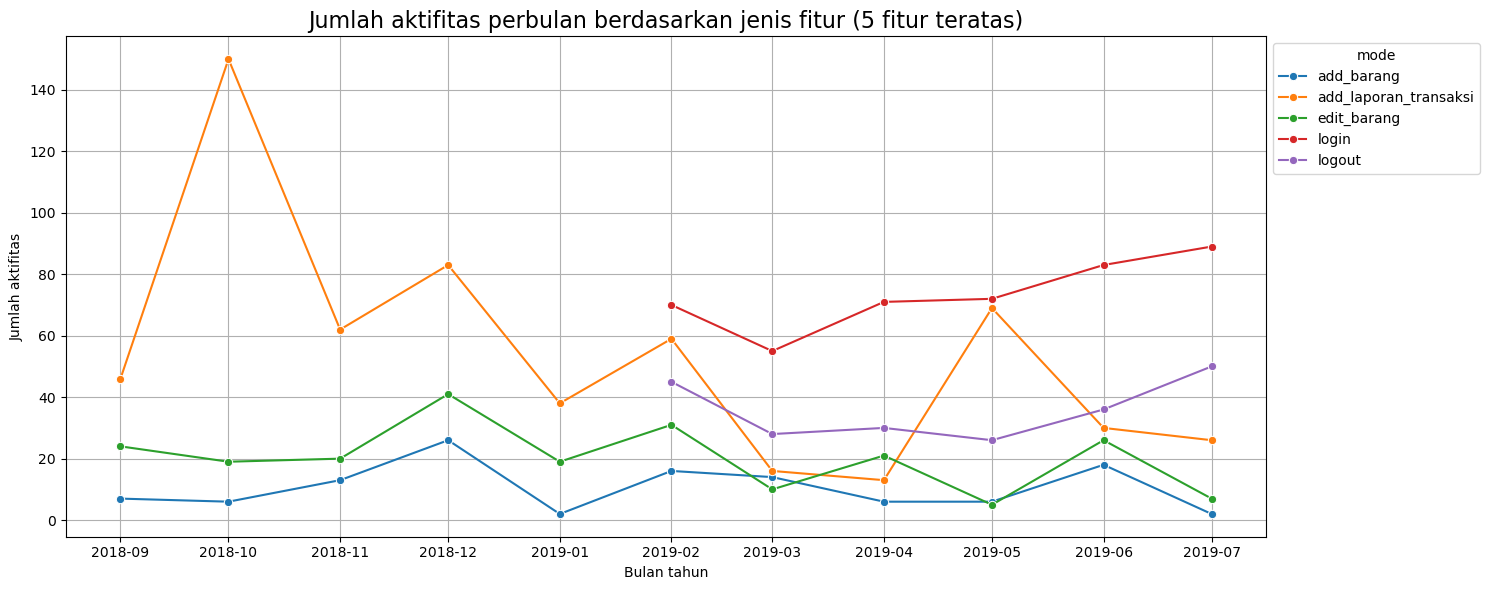

In [56]:
modes = ['add_laporan_transaksi','login','edit_barang','logout','add_barang']

result = df_log.loc[df_log['mode'].isin(modes)].copy()

result = result.groupby(['year_month','mode']).size().reset_index(name='count').copy()
result

# # Flatten axes for easy iteration

# # group_data = result[result['mode'].isin(modes)]
# # group_data
# # Plot each group in a separate subplot
fig, axes = plt.subplots(figsize=(15, 6))
sns.lineplot(data=result, x='year_month', y='count', hue='mode', ax=axes,marker='o')

# Customize the plot
axes.set_title('Jumlah aktifitas perbulan berdasarkan jenis fitur (5 fitur teratas)',fontsize=16)
axes.set_xlabel('Bulan tahun')
axes.set_ylabel('Jumlah aktifitas')
axes.tick_params(axis='x')
sns.move_legend(axes, "upper left", bbox_to_anchor=(1, 1), ncol=1)
axes.grid(True)
# axes.xaxis.set_major_locator(mdates.AutoDateLocator())
# axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [58]:
result = df_log.groupby(['day','hari', 'mode']).size().reset_index(name='count')
result = result.groupby(['day','hari', 'mode'])['count'].mean().reset_index(name='average_count')
result

,day,hari,mode,average_count
0,0,Senin,add_barang,23.0
1,0,Senin,add_diskon,19.0
2,0,Senin,add_laporan_pembelian,13.0
3,0,Senin,add_laporan_transaksi,137.0
4,0,Senin,add_pelanggan,1.0
...,...,...,...,...
182,6,Minggu,import_barang,1.0
183,6,Minggu,login,20.0
184,6,Minggu,logout,7.0
185,6,Minggu,tambah_stok,3.0


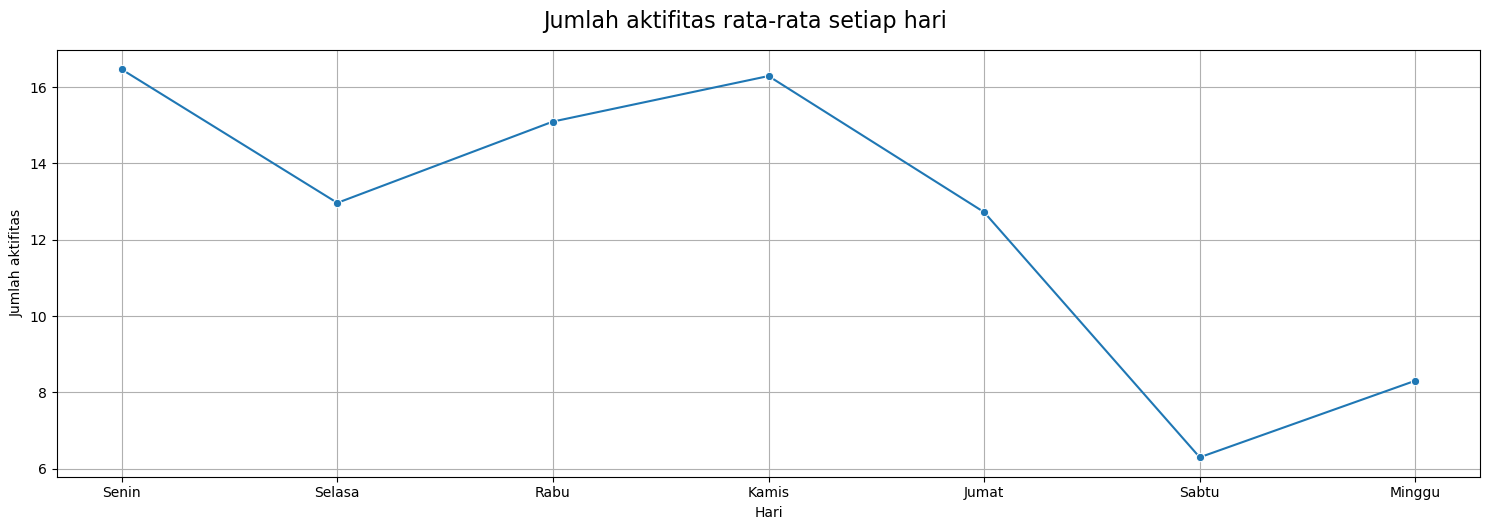

In [60]:
result = df_log.groupby(['day','hari', 'mode']).size().reset_index(name='count').copy()
result = result.sort_values(by=['day'],ignore_index=True)
result = result.groupby(['day','hari'])['count'].mean().reset_index(name='average_count')

fig, axes = plt.subplots(figsize=(15, 5))
sns.lineplot(data=result, x='hari', y='average_count', ax=axes,marker='o')
axes.set_xlabel('Hari')
axes.set_ylabel('Jumlah aktifitas')
axes.tick_params(axis='x')
axes.grid(True)
plt.tight_layout()
plt.suptitle('Jumlah aktifitas rata-rata setiap hari',fontsize=16, x=0.5, y=1.05)
plt.show()

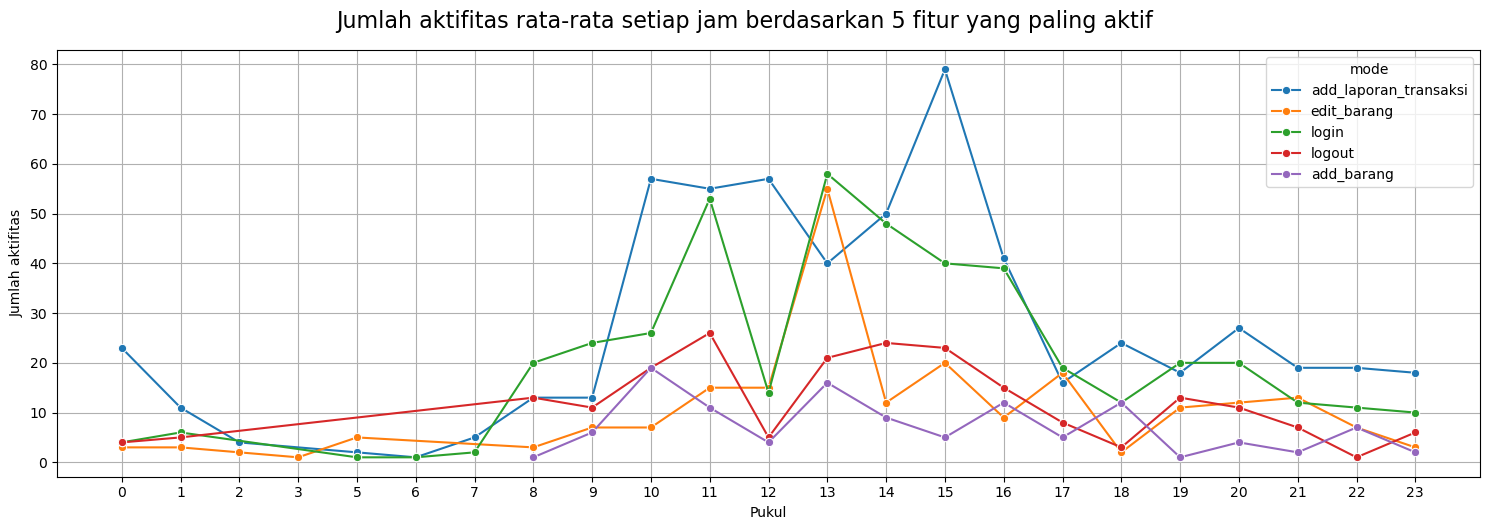

In [62]:
result = df_log.groupby(['hour', 'mode']).size().reset_index(name='count').copy()
result = result.groupby(['hour', 'mode'])['count'].mean().reset_index(name='average_count')
result['hour'] = result['hour'].astype(str)
modes = ['add_laporan_transaksi','login','edit_barang','logout','add_barang']
fig, axes = plt.subplots(figsize=(15, 5))
group_data = result.loc[result['mode'].isin(modes)]
sns.lineplot(data=group_data, x='hour', y='average_count',hue='mode', ax=axes,marker='o')
axes.set_xlabel('Pukul')
axes.set_ylabel('Jumlah aktifitas')
axes.tick_params(axis='x')
axes.grid(True)
plt.tight_layout()
plt.suptitle('Jumlah aktifitas rata-rata setiap jam berdasarkan 5 fitur yang paling aktif',fontsize=16, x=0.5, y=1.05)
plt.show()

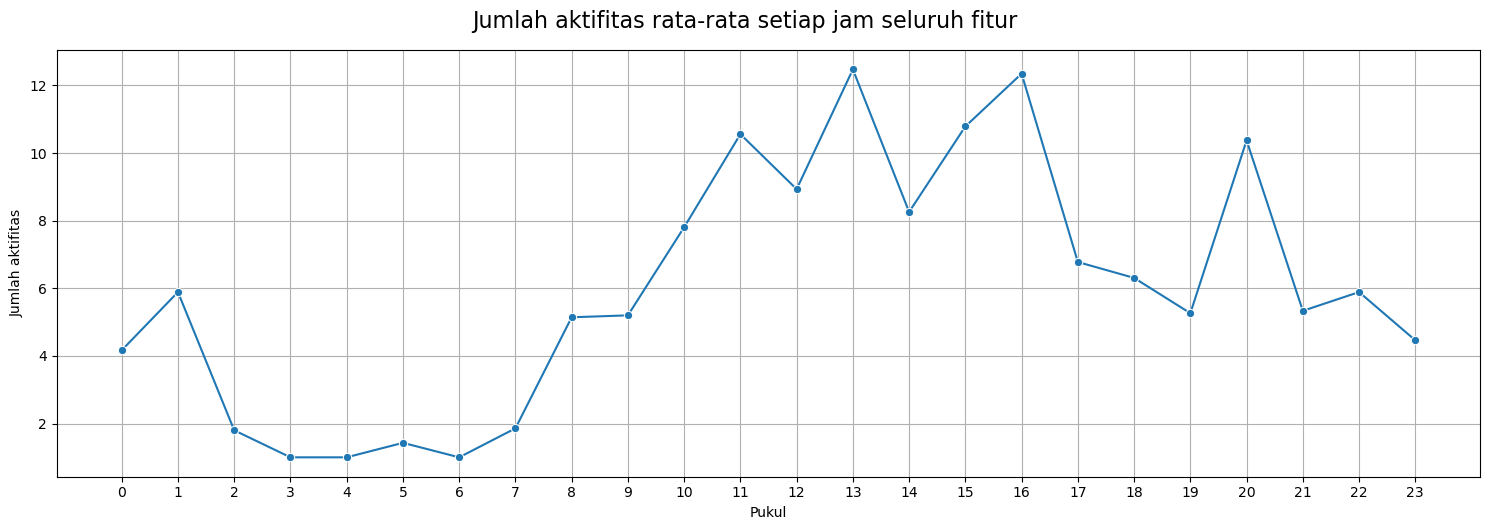

In [64]:
result = df_log.groupby(['hour', 'mode']).size().reset_index(name='count').copy()
result = result.groupby(['hour'])['count'].mean().reset_index(name='average_count')
result['hour'] = result['hour'].astype(str)
fig, axes = plt.subplots(figsize=(15, 5))
sns.lineplot(data=result, x='hour', y='average_count', ax=axes,marker='o')
# axes.set_title(f'Fitur ({mods})')
axes.set_xlabel('Pukul')
axes.set_ylabel('Jumlah aktifitas')
axes.tick_params(axis='x')
axes.grid(True)
plt.tight_layout()
plt.suptitle('Jumlah aktifitas rata-rata setiap jam seluruh fitur',fontsize=16, x=0.5, y=1.05)
plt.show()